*GitHub page of the [exercise](https://github.com/adam-srut/Ligand_Field.git "GitHub link").*

##### Load modules and function necessary for the workflow:

In [2]:
using WignerSymbols, SphericalHarmonics
using Plots; gr(); theme(:vibrant);
using Printf
using DataFrames
using LinearAlgebra
using Luxor
using LaTeXStrings
ENV["COLUMNS"]=200;
include("./LF_functions.jl");

# Ligand field theory

<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;In this exercise you will construct a metal complex and compute the splitting of the d-orbitals in the electrostatic field of ligands. You will then compare qualitative results obtained from the ligand field theory with quantum chemical ($\textit{ab initio}$) calculations.
</div>

<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;The ligand field theory is usually conceptualized as in the figure bellow. If a metal ion is put into a potential filed of charged ligands the d-orbitals will first go higher in energy. Subsequently, the d-orbitals are split into two to five energy levels depending on the symmetry of the ligand field. In case of octahedral ligand field, we obtain two new energy levels, the doubly degenerate e$_\mathrm{g}$ level and triply degenerate t$_\mathrm{2g}$ level. In the next section we will take a closer look to the origins of the splitting in the ligand field. As a result, a reader will be able to determine qualitatively the new energy levels of the d-orbitals only by specifying the ligand positions.
</div>

![splitting](splitting-example.png)

## Basic principles
<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;First, let us begin with necessary theory needed to understand the idea of the ligand field theory. We start with a metal ion in vacuum, we restrict ourselves only to the d-orbitals and ignore all other shells. The d-orbitals are the solution of the Schrödinger equation of an ion in vacuum. In spherical coordinates we can write the d-orbital with a magnetic quantum number $m$ as:  
<br><center>
\begin{equation}
    d_{m}(r,\theta,\phi) = R(r) \cdot Y^{m}_{l=2}(\theta,\phi)
\end{equation}
</center><br>
where $R(r)$ is the radial part and $Y^{m}_{l=2}(\theta,\phi)$ is the angular part in a form of a spherical harmonic. Now, lets add ligands around the metal ion. Ligands will be represented by point charges. The potential of the ligand field with $N_L$ ligands positioned at $\mathbf{R}_i$ with charge $q_i$ at a point $\mathbf{r}$ is:
<br><center>
\begin{equation}
    \hat{V}^\mathrm{LF}(\mathbf{r}) = \sum\limits_{i=1}^{N_L} \frac{q_i}{|\mathbf{R}_i - \mathbf{r}|}
\end{equation}
</center><br>
&nbsp;&nbsp;&nbsp;&nbsp;Under the action of the ligand field the d-orbitals (defined in Eq. 1) are no longer a solution of the Schrödinger equation. The solution can be, however, obtained as a linear combination of the d-orbitals that has the lowest energy. The fact that the best wavefunction will have the lowest energy is called the $\textit{variational principle}$.
To find the best wavefunction with the lowest energy we have to solve so-called secular equations. It is a set of $N$ coupled equations where $N$ is the number of basis functions. In our case $N$ is equal to 5, the basis functions are the d-orbitals with different magnetic quantum number $m_l = -l,\dots,l$ ($l=2$ for d-orbitals). The secular equation for a magnetic quantum number $m$ would have a form:
<center>
\begin{equation}
    \sum\limits_{m'=-2}^{2} c_{m'} \left( 
    \int\limits_0^\infty \int\limits_0^{\pi} \int\limits_0^{2\pi}
    ~d_{m'}^* \hat{V}^{LF} d_{m} ~ r^2\sin\theta\,\mathrm{d}\phi\mathrm{d}\theta\mathrm{d}r
    - \delta_{m',m}\epsilon \right)=0
\end{equation}
</center>
<center>
\begin{equation}
    \sum\limits_{m'=-2}^{2} c_{m'} \left( V_{m',m} - \delta_{m',m}\epsilon \right) = 0
\end{equation}
</center>
<br>
where $\epsilon$ is the energy and $\delta_{m,m'}$ is the Kronecker-delta. The integral in Eq. 3 represents the action of the ligand field potential on the $d_m$ orbital, multiplied from the left by a complex conjugated $d_{m'}$ orbital and integrated over the whole space. These integrals are called the $\textit{resonance integrals}$. In Eq. 4 we substituted the resonance integral by term $V_{m',m}$ to simplify the whole expression. Secular equations are a system of coupled equations due to the presence of the sum over $m'$, which means that they cannot be solved individually.
To find the solution lets write all equations in a matrix form:
</div>
<center>
\begin{equation}
    \begin{pmatrix} 
    V_{-2,-2}-\epsilon & V_{-2,-1} & V_{-2,0} & V_{-2,1} & V_{-2,2} \\
    V_{-1,-2} & V_{-1,-1}-\epsilon & V_{-1,0} & V_{-1,1} & V_{-1,2} \\
    V_{0,-2} & V_{0,-1} & V_{0,0}-\epsilon & V_{0,1} & V_{0,2} \\
    V_{1,-2} & V_{0,-1} & V_{1,0} & V_{1,1}-\epsilon & V_{1,2} \\
    V_{2,-2} & V_{2,-1} & V_{2,0} & V_{2,1} & V_{2,2}-\epsilon
    \end{pmatrix}
    \begin{pmatrix} c_{-2} \\ c_{-1} \\ c_0 \\ c_1 \\ c_2 \end{pmatrix} = 0
\end{equation}
</center>
<br>
<center>
\begin{equation}
    \left( \mathbf{V} - \mathbf{I}\epsilon \right) \mathbf{c} = 0
\end{equation}
</center>
<br>
<div style="text-align: justify">
Eq. 6 is only a compactly written Eq. 5, matrix $\mathbf{I}$ is the identity matrix. How can we then solve these equations? Linear algebra teaches us that the system of linear equations with the right-hand-side equal to $0$ will have a non-trivial solution ($\mathbf{c} \ne 0$) if and only if the determinant of the system (here the so-called $\textit{secular determinant}$) is zero:
<br><center>
\begin{equation}
    \det| \mathbf{V} - \mathbf{I}\epsilon | = 0
\end{equation}
</center><br>
this is an algebraic equation for unknown $\epsilon$. In our case, the left-hand-side of Eq. 7 will be a polynomial of the 5-th order which means that we are going to find 5 values of $\epsilon$ as a solution. These will be the new energies of the d-orbitals in the ligand field potential!
</div>
<br><br>
<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;Now, it is time to take a closer look to the resonance integrals that appeared in Eq. 3. If we want to construct and solve the secular equations we need to evaluate these integrals. This is not an easy task from a mathematical point of view. Luckily enough, analytical expressions for the resonance integrals can be found in the literature. We use an analytical expression from the book: $\textit{Electronic structure and properties of transition metal complexes}$ by Isaac Bersurker.
<center>
\begin{equation}
    V_{m',m} = \int\limits_0^\infty \int\limits_0^{\pi} \int\limits_0^{2\pi}
    ~d_{m'}^* \hat{V}^{LF} d_{m} ~ r^2\sin\theta\,\mathrm{d}\phi\mathrm{d}\theta\mathrm{d}r
\end{equation}
</center>
<br><center>
\begin{equation}
    V_{m',m} = 
    \sum\limits_{i=1}^{N_L} q_i \left[ 
    A_{m',m} F_4(R_i) Y_4^{m'-m}(\theta_i,\phi_i) + 
    B_{m',m} F_2(R_i) Y_2^{m'-m}(\theta_i,\phi_i) +
    C_{m',m} F_0(R_i) Y_0^{m'-m}(\theta_i,\phi_i) \right]
\end{equation}
</center><br>
&nbsp;&nbsp;&nbsp;&nbsp;At a first glance this seems to be a quite complicated expression, but there is nothing to be afraid of. Lets break down the integral in Eq. 9 into individual terms. 
We notice that each ligand contributes to the integral with three terms (content of the braket), each of these terms consists of a tabulated constant ($A_{m',m}$, $B_{m',m}$ and $C_{m',m}$), Slater$-$Condon parameter (F$_4$, F$_2$ and F$_0$) and the so-called structure parameter which has a form a spherical harmonic.
</div>

<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;The tabulated constants $A_{m',m}$, $B_{m',m}$ and $C_{m',m}$ arise from the angular part of the integral defined in Eq. 8, they were evaluated once for all and can be found in the literature.
</div>

<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;The Slater$-$Condon parameters F$_4$, F$_2$ and F$_0$ comes from the radial part of the integral in Eq. 8. They depend on a distance of the ligand from the metal ion. They can be in principle evaluated to get the new energies of the d-orbitals, this would, however, lead to ultimately absurd numbers! The Slater$-$Condon parameters are not evaluted, the new energies of the d-orbitals are obtained as a function of these parameters and their values are then determined by comparison with an experiment of with an $\textit{ab initio}$ theory.
</div>

<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;The angular positions of the ligands ($\theta_i$ and $\phi_i$) are inserted via the structure parameters which have a form the spherical hamonics with angular quantum number equal to the index of the Slater$-$Condon parameter. That is $Y_l(\theta_i,\phi_i)$ where $l=0,2,4$. Lets take a closer look on the very last term in Eq. 9, the positions of the ligands enter here through $Y_0(\theta_i,\phi_i)$. An attentive reader might notice that $Y_0$ is actually the angular part of a s-orbital, which has a spherical symmetry. This means that regardless of the ligand position, the $Y_0(\theta_i,\phi_i)$ will always have the same value! This last term is then the spherical potential of the ligands which only lifts up the energy of the d-orbitals but does not cause any splitting. Terms responsible for the splitting are the first two in Eq. 9.
</div>

### Conclusion

<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;And what is the take-away message for the reader? Lets recap the above part without any math. We started with a metal ion in vacuum, the solution of the Schrödinger equation was represented by 5 d-orbitals. Then, we added ligands around the metal ion as point charges. 
We tried to find a new solution of the Schrödinger equation with the potential of the ligands accounted in the Hamiltonian. To do that, we employed the variational principle which lead to a system of secular equations. By solving these equations we obtained the new energy levels of the d-orbitals in the ligand field. 
In the secular equation we had to evaluate the resonance integrals, here we made a use of prior work of chemists and physicists who already found the analytical expressions for these integrals. We have evaluated these integrals except for their radial part, which we treated as a parameter. These parameters can be later obtained from spectroscopic measurements or from $\textit{ab initio}$ calculations.     
</div>

# Example: Metal-ion in a square planar field
        
Bellow you will find the example use of this notebook demonstrated on a metal ion in a square planar field or equally charge equidistant ligands.

## Creating the complex:
The positions of ligands in spherical coordinates have to be specified in arrays `ligands_theta` and `ligands_phi`, we assume that the distance to the metal ion is the same for all the ligands.
    
Geometry of cubic complex is demonstrated bellow:


    

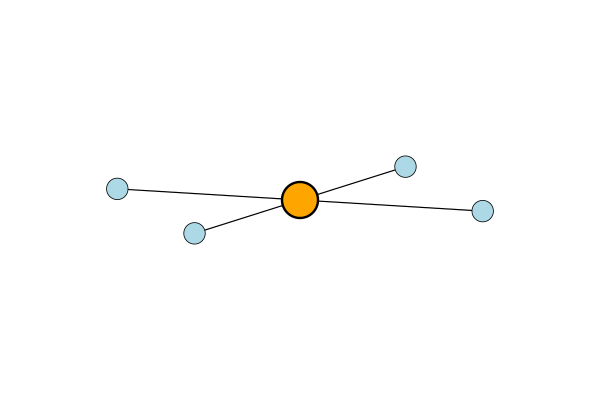

In [3]:
# ligands_theta = [ pi/4, pi/4, pi/4, pi/4, pi*3/4, pi*3/4, pi*3/4, pi*3/4 ];     # cuboid
# ligands_phi = [ pi/4, pi*3/4, pi*5/4, pi*7/4, pi/4, pi*3/4, pi*5/4, pi*7/4  ];  # cuboid
ligands_theta = [ pi/2, pi/2, pi/2, pi/2]   # Square planar
ligands_phi = [ 0 , pi/2, pi, pi*3/2 ]      # Square planar 
plot_ligs(ligands_theta, ligands_phi)

You can save the visualization of the complex with the `savefig` function:

In [3]:
#savefig("cube.svg")

## Constructing the secular equations (matrix $\mathbf{V}$)
Function `construct_Htot` takes position of ligands as arguments and computes the matrix $\mathbf{V}$ defined in Eqs. 5 and 6.

You can also use function `construct_Htot_DF` which takes the same arguments and return matrix $\mathbf{V}$ in nicer format, this is, however, not suitable for exporting the notebook to pdf format.

In [5]:
#construct_Htot_DF(ligands_theta, ligands_phi) 
construct_Htot(ligands_theta, ligands_phi)

L"$\begin{smallmatrix} + 4.00\cdot F_0 + 0.57\cdot F_2 + 0.07\cdot F_4&&&& + 0.83\cdot F_4&\\& + 4.00\cdot F_0 - 0.29\cdot F_2 - 0.29\cdot F_4&&&&\\&& + 4.00\cdot F_0 - 0.57\cdot F_2 + 0.43\cdot F_4&&&\\&&& + 4.00\cdot F_0 - 0.29\cdot F_2 - 0.29\cdot F_4&&\\ + 0.83\cdot F_4&&&& + 4.00\cdot F_0 + 0.57\cdot F_2 + 0.07\cdot F_4&\\\end{smallmatrix}$"

Function `do_splitting` will plot the energy the new energy levels of the d-orbitals. This is done by solving the secular equations.
The Slater$-$Condon parameters ($F_0$, $F_2$ and $F_4$) has to be provided as an input along with the ligand positions. Function also saves the image as `d-orb_splitting.png` file in the notebook directory.

*Absolute values of Slater$-$Condon parameters are arbitrary, do not use a large number so the new energies will be within the range of the plot. Parameter $F_0$ should not be larger than 0.3, parameters $F_2$ and $F_4$ should range between 0 and 4.*

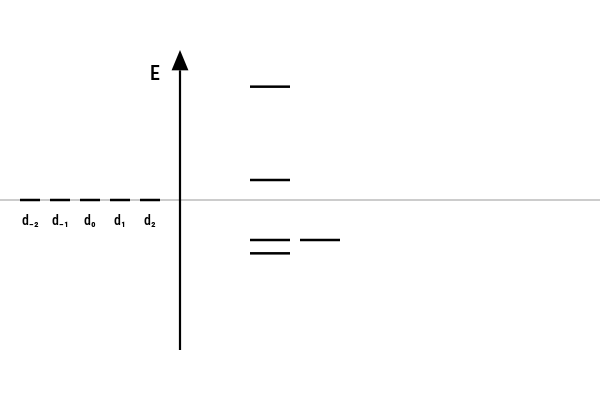

In [5]:
do_splitting(ligands_theta, ligands_phi, f0=0, f2=1, f4=2.5)

<p><div style="page-break-after:always;"></div></p>

# Studied problem

Complex [Cr(H$_2$O)$_6$]$^{3+}$ is an octahedral complex that has a slight pink color in water solution, when acetone is added to the complex switch from octahedral arrangement to tetrahedral one, [Cr(H$_2$O)$_4$]$^{3+}$,  and get a bright blue color.
You can watch the experiment [here](https://twitter.com/BruceLickey/status/1547282378661535750 "Twitter - experiment"). 

In the exercises your goal will be to explain why octahedral and tetrahedral arrangements of water molecule around Cr$^{3+}$ ion results in different colors and also why is the blue color more intensive that the pink one. To do so, you will use $\textit{ab inito}$ calculations and the ligand field theory.

## Exercise 1: Optical transitions in [Cr(H$_2$O)$_6$]$^{3+}$

In this exercise you will follow the protocol from the example case presented above. 

1. Prepare a metal-ion in an octahedral field
  - Determine the spherical coordinates of ligands in octahedral arrangement (define variables `ligands_theta` and `ligands_phi`).
2. Compute and discuss the properties of the $\mathbf{V}$ matrix
  - Use function `construct_Htot` or `construct_Htot_DF`.
  - Compute the splitting of the d-orbitals (function `do_splitting`)
  - Vary the values of Slater$-$Condon parameter to see their impact on the splitting.
  - Can you disentangle the shift of the d-orbitals to higher energies and their splitting just from the $\mathbf{V}$ matrix?
  - The $\mathbf{V}$ matrix is computed in the basis of d$_{-2}$, d$_{-1}$, d$_0$, d$_1$ and d$_2$ orbitals. What is the relation between these orbitals and orbitals d$_{z^2}$, d$_{xz}$, d$_{xy}$, d$_{yz}$ and d$_{x^2-y^2}$? 
  - Use the scheme obtained from the function `do_splitting` and fill the orbitals with electrons to get a configuration with the lowest energy. Think about all possible excited states.
3. Explore the effect of symmetry perturbation
  - Build a new complex with slightly perturbed octahedral symmetry.
  - Compute again the $\mathbf{V}$ matrix and the splitting of the d-orbitals.
  - Compare with the symmetric case and discuss the results.
4. Explain the optical transition
  - Identify the optical transition between the d-orbitals for symmetric and non-symmetric case.
  - Is this transition allowed or forbidden? Explain why!

####  Symmetric octahedral field 

In [6]:
# ligands_theta = [  ] 
# ligands_phi = [  ] 
# plot_ligs(ligands_theta, ligands_phi)

In [7]:
# construct_Htot(ligands_theta, ligands_phi)

In [8]:
# do_splitting(ligands_theta, ligands_phi, f0=, f2=, f4=)

#### Distorted octahedral field 

In [6]:
# ligands_theta = [  ] 
# ligands_phi = [  ] 
# plot_ligs(ligands_theta, ligands_phi)

In [7]:
# construct_Htot(ligands_theta, ligands_phi)

In [8]:
# do_splitting(ligands_theta, ligands_phi, f0=, f2=, f4=)

## Exercise 2: Quantum chemical calculations

In the directories `Cr_*` you will find the input files (`single-point-calc.inp`) needed to carry out the quantum chemistry calculations.
You can run the quantum chemistry calculation directly from the notebook. Use the example in the cell bellow. You only need to specify the directory in which the calculation will be done.

In [33]:
# cmd = "\$ORCADIR/orca single-point-calc.inp > single-point-calc.out"
# run(Cmd(`/bin/bash -c $cmd`, dir="Cr_octahedral"));

## Exercise 3: Summarizing the results

1. Which transitions between the d-orbitals is responsible for the pink color of the octahedral complex?
2. Why are the transitions in octahedral complex visible (allowed)?
3. Which transition between the d-orbitals is responsible for the blue color of the tetrahedral complex?
4. Use the generated images of the d-orbital splitting to schematically draw the transitions.
5. Is the splitting larger in octahedral or tetrahedral complex?
6. For which complex would you expect larger shift of the d-orbitals caused by spherical contribution of the ligand field?

In [6]:
str = "grep 'ABSORPTION SPECTRUM' -A 15 single-point-calc.out | tail -n 16"
run(Cmd(`/bin/bash -c $str`, dir="Cr_octahedral"));

                                ABSORPTION SPECTRUM
------------------------------------------------------------------------------------------
  States           Energy   Wavelength   fosc          T2        TX         TY        TZ  
                   (cm-1)     (nm)                   (D**2)      (D)        (D)       (D) 
------------------------------------------------------------------------------------------
  0( 0)-> 1( 0) 4   10687.6    935.7   0.000007806   0.00155   0.00000  -0.02785   0.02785
  0( 0)-> 2( 0) 4   11113.3    899.8   0.000001917   0.00037  -0.01906   0.00122   0.00122
  0( 0)-> 3( 0) 4   11118.7    899.4   0.000002268   0.00043  -0.00188  -0.01465  -0.01466
  0( 0)-> 4( 0) 4   17783.9    562.3   0.000000531   0.00006  -0.00030   0.00563   0.00563
  0( 0)-> 5( 0) 4   18051.5    554.0   0.000000001   0.00000  -0.00000  -0.00022   0.00022
  0( 0)-> 6( 0) 4   18235.2    548.4   0.000004256   0.00050   0.00000   0.01574  -0.01574
  0( 0)-> 7( 0) 4   30585.8    326.9  